<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/77_river_network_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
%%capture
!pip install pysheds

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch
from matplotlib import colors
from pysheds.grid import Grid

In [ ]:
dem_file = pooch.retrieve(
    'https://geonb.snb.ca/downloads2/elevation/20152018/dem/geotiff/nb_2015_2018_dem_2560000_7440000.tif',
    known_hash='ae1067cd444bc6e4e1a240d8c3030d8f3600fee74667a619da8f6c2b3ab36476'
)

In [ ]:
grid = Grid.from_raster(dem_file)
dem = grid.read_raster(dem_file)

pit_filled_dem = grid.fill_pits(dem)
flooded_dem = grid.fill_depressions(pit_filled_dem)
inflated_dem = grid.resolve_flats(flooded_dem)

fdir = grid.flowdir(inflated_dem)
acc = grid.accumulation(fdir)
rivers = grid.extract_river_network(fdir, acc > 100_000)

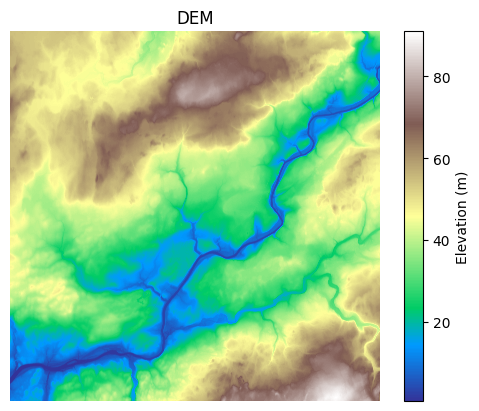

In [ ]:
plt.imshow(dem, extent=grid.extent, cmap='terrain', zorder=1)
plt.colorbar(label='Elevation (m)')
plt.grid(zorder=0)
plt.title('DEM')
plt.axis('off');

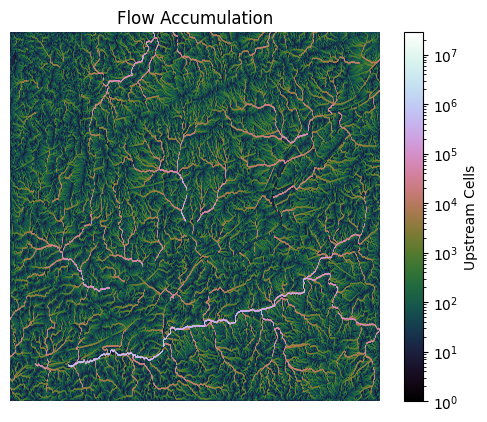

In [ ]:
plt.imshow(acc, extent=grid.extent, zorder=2,
           cmap='cubehelix',
           norm=colors.LogNorm(1, acc.max()),
           interpolation='bilinear')
plt.colorbar(label='Upstream Cells')
plt.title('Flow Accumulation')
plt.axis('off');

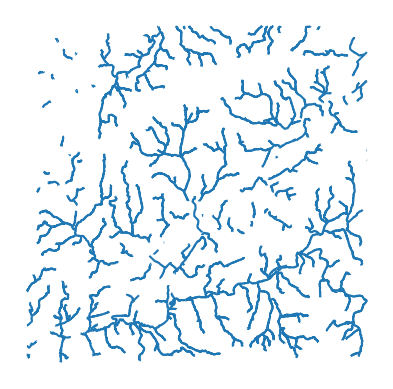

In [ ]:
rivers_df = gpd.GeoDataFrame.from_features(rivers)
rivers_df.plot()
plt.axis('off');